<a href="https://colab.research.google.com/github/Nimisha09-gha/solid-disco/blob/main/Analyze_Sentiment_in_Movie_Reviews_Nimisha_Ghatole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyze sentiment in movie reviews**

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import chardet
from sklearn.preprocessing import LabelEncoder
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Loading the DataSet

In [4]:
with open("/content/IMDB Dataset.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

df = pd.read_csv("/content/IMDB Dataset.csv", encoding=encoding)

Performing EDA

In [5]:
df = df.sample(15000)

In [6]:
df.shape

(15000, 2)

In [7]:
df.head()

,review,sentiment
20780,I'm a fan of TV movies in general and this was...,positive
4731,I do agree that though this story by Melville ...,negative
6260,OMG! The only reason I'm giving this movie a 2...,negative
1492,I found this movie to be extremely delightful....,positive
15052,I saw this movie being a Jane Austen addicted ...,positive


In [8]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
df.describe()

,review,sentiment
count,15000,15000
unique,14960,2
top,This series is formulaic and boring. The episo...,negative
freq,2,7546


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 20780 to 12784
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     15000 non-null  object
 1   sentiment  15000 non-null  object
dtypes: object(2)
memory usage: 351.6+ KB


In [11]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [12]:
df['sentiment'].value_counts()

negative    7546
positive    7454
Name: sentiment, dtype: int64

<Axes: xlabel='count', ylabel='sentiment'>

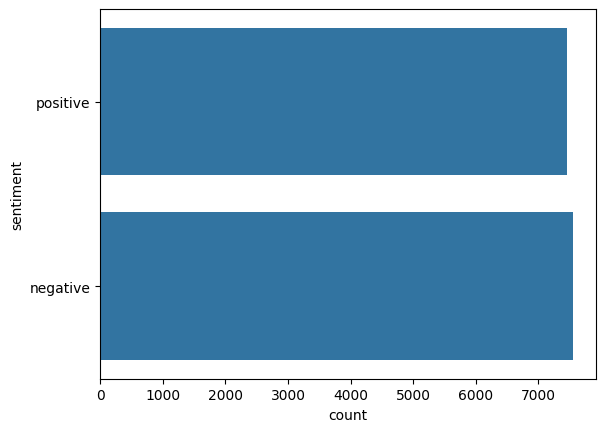

In [13]:
sns.countplot(df['sentiment'])

Applying LabelEncoding to convert sentiment to numericals (Positive: 1 , Negative: 0)

In [14]:
label = LabelEncoder()
df['sentiment'] = label.fit_transform(df['sentiment'])

In [15]:
df.head()

,review,sentiment
20780,I'm a fan of TV movies in general and this was...,1
4731,I do agree that though this story by Melville ...,0
6260,OMG! The only reason I'm giving this movie a 2...,0
1492,I found this movie to be extremely delightful....,1
15052,I saw this movie being a Jane Austen addicted ...,1


### Splitting the Data into Dependent and Independent

In [16]:
X = df['review']
y = df['sentiment']

Removing all the special and numerical characters from the DataFrame

Removing stopwords and applying Stemming

In [ ]:
ps = PorterStemmer()
corpus = []

for i in range (len(X)):
  print(i)
  review = re.sub("[^a-zA-Z]"," ",X.iloc[i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
  review = " ".join(review)
  corpus.append(review)

Applying TfidfVectorizer to convert text data into vectors

In [18]:
cv = TfidfVectorizer(max_features=500)
X = cv.fit_transform(corpus).toarray()

In [19]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

In [20]:
X.shape

(15000, 500)

Splitting the data into train and test

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [22]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((12000, 500), (3000, 500), (12000,), (3000,))

Defining the Naive-bayes Model

In [23]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

MultinomialNB()

testing the model using test data

In [24]:
pred = mnb.predict(X_test)

Checking all the accuracy_score, confusion_matrix and classification-report

In [25]:
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

0.8246666666666667
[[1204  276]
 [ 250 1270]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1480
           1       0.82      0.84      0.83      1520

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



Differentiating between the actual data and the Predicted data

In [26]:
pd.DataFrame(np.c_[Y_test, pred], columns = ["Actual" , "Predicted"])

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
2995,1,1
2996,0,0
2997,1,1
2998,1,1


In [27]:
pickle.dump(cv , open("count_Vectorizer.pkl" , "wb"))
pickle.dump(mnb , open("Movies_Review_Classification.pkl" , "wb"))

In [28]:
!cat count_Vectorizer.pkl
!cat Movies_Review_Classification.pkl

(?u)\b\w\w+\b��
stop_words�N�max_df�G?�      �min_df�K�max_features�M��ngram_range�KK���
vocabulary�N�binary���dtype��numpy��float64����norm��l2��use_idf���
smooth_idf���sublinear_tf���_tfidf�h �TfidfTransformer���)��}�(hh h!�h"�h#��n_features_in_�M��	_idf_diag��scipy.sparse._csr��
csr_matrix���)��}�(�_shape�M�M����maxprint�K2�indices��numpy.core.multiarray��_reconstruct���h�ndarray���K ��Cb���R�(KM���h�dtype����i4�����R�(K�<�NNNJ����J����K t�b�B�                              	   
                                                             !   "   #   $   %   &   '   (   )   *   +   ,   -   .   /   0   1   2   3   4   5   6   7   8   9   :   ;   <   =   >   ?   @   A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z   [   \   ]   ^   _   `   a   b   c   d   e   f   g   h   i   j   k   l   m   n   o   p   q   r   s   t   u   v   w   x   y   z   {   |   }   ~      �   �  

Loading the naive-bayes model and TfidfVectorizer

In [29]:
save_cv = pickle.load(open('count_Vectorizer.pkl' , 'rb'))
model = pickle.load(open('Movies_Review_Classification.pkl' , 'rb'))

Defining function to test the model

In [30]:
def test_model(sentance):
  sen = save_cv.transform([sentance]).toarray()
  res = model.predict(sen)[0]
  if res == 1:
    return 'Positive review'
  else:
    return 'Negative review'

### Checking the first positive review and the prediction

In [31]:
sen = "I enjoyed this movie a lot"
res = test_model(sen)
print(res)

Positive review


### Checking the second negative review and the prediction

In [32]:
sen = "It was really a worst movie, i will never watch again"
res = test_model(sen)
print(res)

Negative review
